In [1]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from distance_functions import get_distances, get_kl_oa_metrics
from evaluation_metrics import get_token_flags, get_metrics_for_multiple_sequences

PATH_DATA = "../0_data/6_word_data"
PATH_MODELS = "../0_data/7_models"
PATH_TOKENS = "../0_data/8_predictions/tokens"
PATH_EVAL = "../0_data/9_evaluation"
PATH_DISTANCES = "../0_data/9_evaluation/distances"

if not os.path.exists(PATH_DISTANCES):
    os.makedirs(PATH_DISTANCES)

In [2]:
vocab_configs = {
    "a1" : {
        "pitch_range": 128,
        "duration_steps": 64,
        "triole_tokens": False,
        "key": "all",
    },
    "a2" : {
        "pitch_range": 128,
        "duration_steps": 64,
        "triole_tokens": True,
        "key": "all",
    },
    "a3" : {
        "pitch_range": 128,
        "duration_steps": 32,
        "triole_tokens": False,
        "key": "all",
    },
    "b" : {
        "pitch_range": 128,
        "duration_steps": 64,
        "triole_tokens": False,
        "key": "C",
    },
    "c" : {
        "pitch_range": 36,
        "duration_steps": 64,
        "triole_tokens": False,
        "key": "all",
    },
    "d" : {
        "pitch_range": 36,
        "duration_steps": 32,
        "triole_tokens": True,
        "key": "C",
    }
}

In [3]:
seq_metrics_dic = {}

# compute metrics for original data
for key in vocab_configs.keys():
    
    path = f"{PATH_DATA}/{key}_token_data.json"
    with open(path, "r") as fp:
        tokens = json.load(fp)
    token_data = [tokens[key] for key in tokens.keys()]

    token_flags = get_token_flags(vocab_configs[key])
    seq_metrics = get_metrics_for_multiple_sequences(token_data, token_flags)
    seq_metrics_dic[f"{key}_original"] = seq_metrics

# compute metrics for generated data hyperparameter models
model_df = pd.read_excel(f"{PATH_MODELS}/model_stats.xlsx", index_col="Unnamed: 0")
for index, row in model_df.iterrows():

    if row["ran"] == "no" or row["runtime"] == "too big - cuda error":
        continue

    model_name = row["name"]
    with open(f"{PATH_TOKENS}/{model_name}.json", "r") as fp:
        tokens = json.load(fp)
    token_data = tokens["data"]

    token_flags = get_token_flags(vocab_configs["d"])
    seq_metrics = get_metrics_for_multiple_sequences(token_data, token_flags)
    seq_metrics_dic[model_name] = seq_metrics

# compute metrics for generated data abcd models
comp_model_df = pd.read_excel(f"{PATH_MODELS}/comparison_model_stats.xlsx", index_col="Unnamed: 0")
for index, row in comp_model_df.iterrows():

    if row["ran"] == "no" or row["runtime"] == "too big - cuda error":
        continue

    model_name = row["name"]
    with open(f"{PATH_TOKENS}/{model_name}.json", "r") as fp:
        tokens = json.load(fp)
    token_data = tokens["data"]

    token_flags = get_token_flags(vocab_configs[model_name])
    seq_metrics = get_metrics_for_multiple_sequences(token_data, token_flags)
    seq_metrics_dic[f"{model_name}_generated"] = seq_metrics

In [4]:
scalar_metrics = [
    "mean_pitch",
    "pitch_count_seq", 
    "pitch_count_bar",
    "pitch_range_seq",
    "pitch_range_bar",
    "pitch_intervals_avg",
    "pitch_intervals_avg_abs",
    "crooked_pitch_count",
    "note_count_seq",
    "note_count_bar",
    "onset_intervals_avg",
    "mean_duration",
]

hist_metrics = [
    "pitch_intervals_hist",
    "pitch_class_hist_numbers",
    #"pitch_class_hist_pitches",
    "onset_intervals_hist",
    "note_length_hist_numbers",
    #"note_length_hist_bins"
]

matrix_metrics = [
    "pitch_class_transition_matrix",
    "note_length_transition_matrix"
]

metrics_list = scalar_metrics + hist_metrics + matrix_metrics

make path and load data
compute distances
compute kl and oa metrics


  0%|          | 0/18 [00:00<?, ?it/s]/Users/julialauten/DataspellProjects/MusicAI/4_evaluation/distance_functions.py:23: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(lambda x: min(pdf_A(x), pdf_B(x)), np.min((np.min(A), np.min(B))), np.max((np.max(A), np.max(B))))[0]
 83%|████████▎ | 15/18 [08:01<01:30, 30.23s/it]/Users/julialauten/DataspellProjects/MusicAI/4_evaluation/distance_functions.py:23: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated

save distance plots


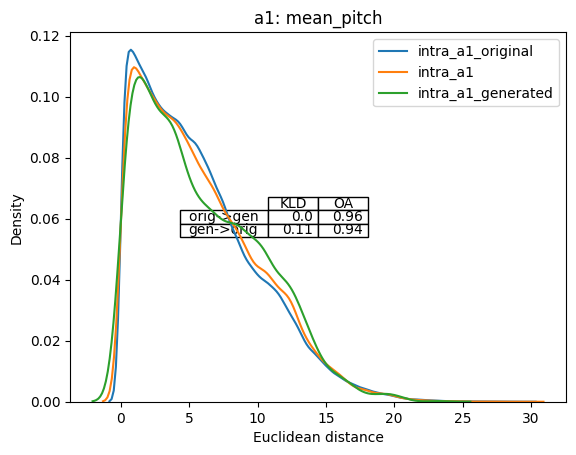

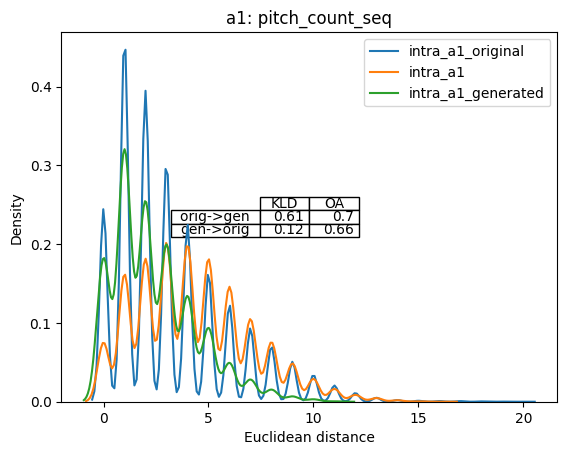

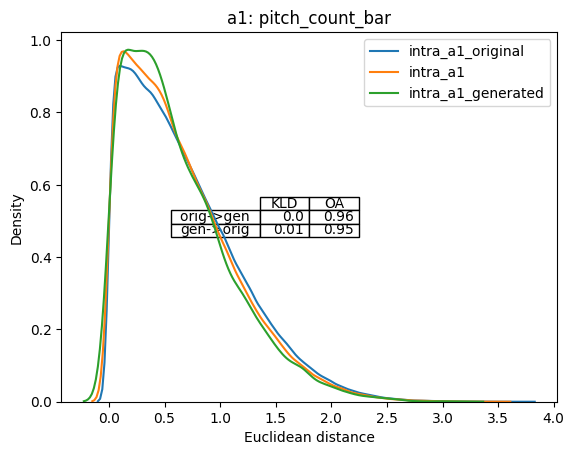

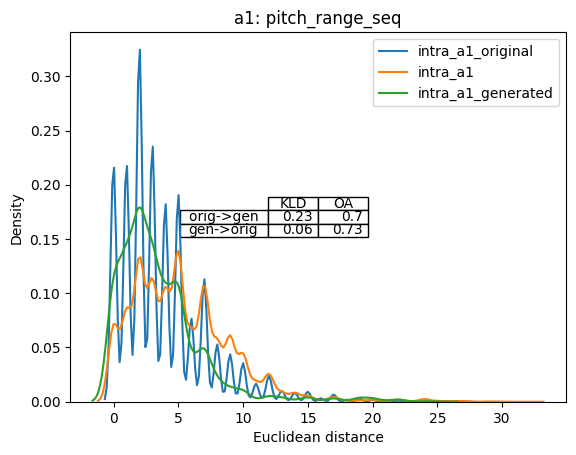

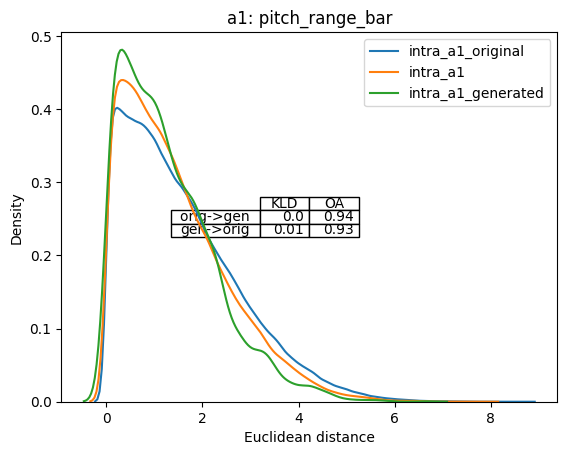

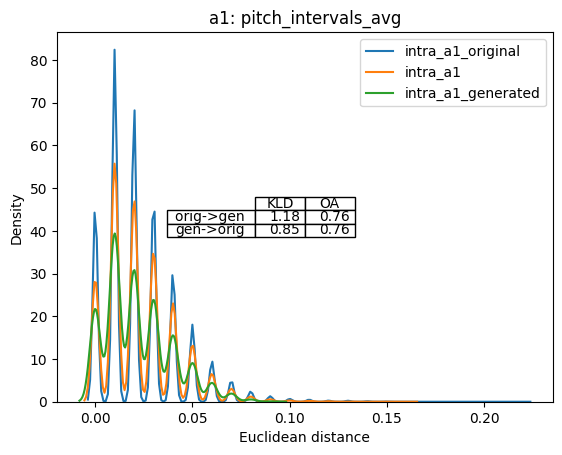

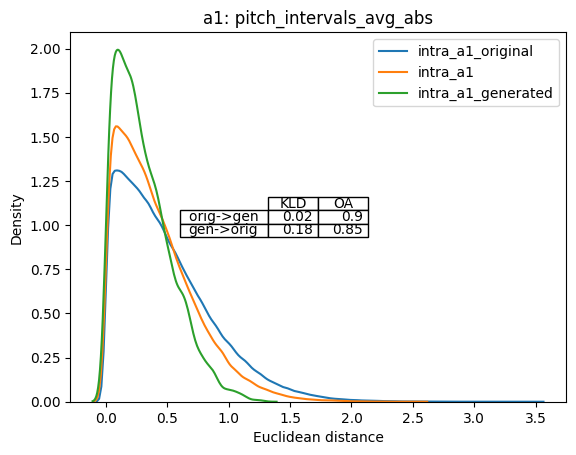

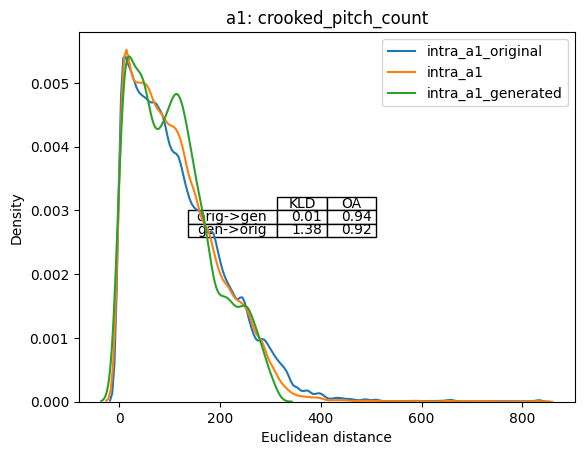

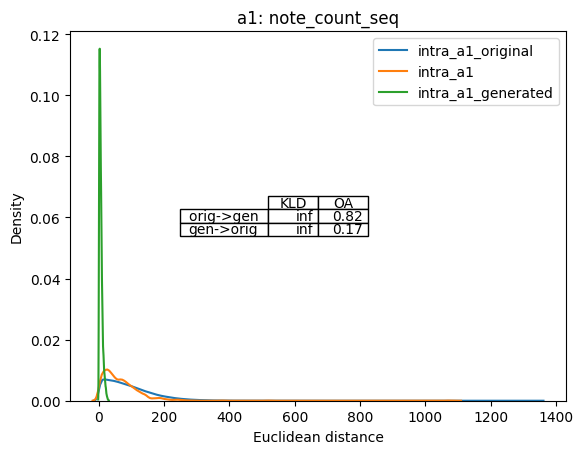

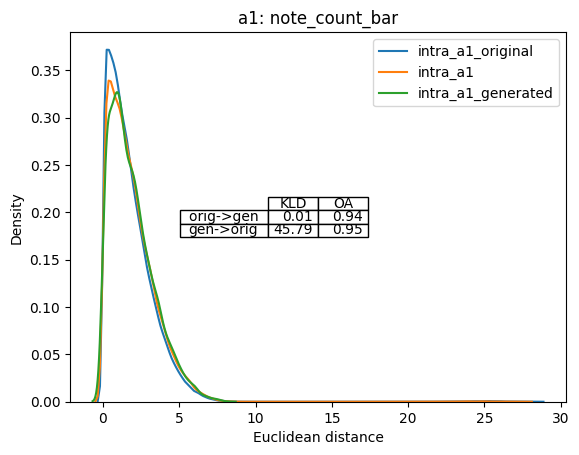

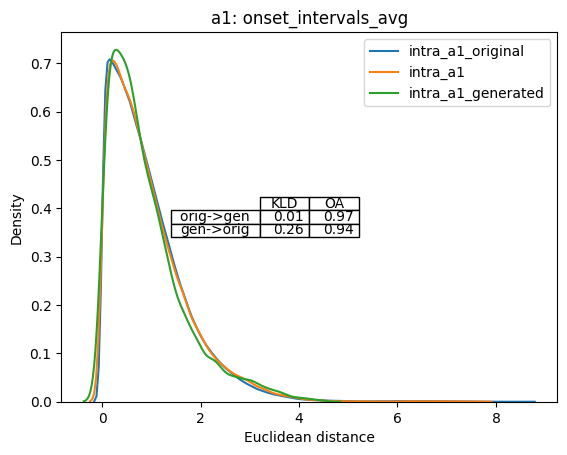

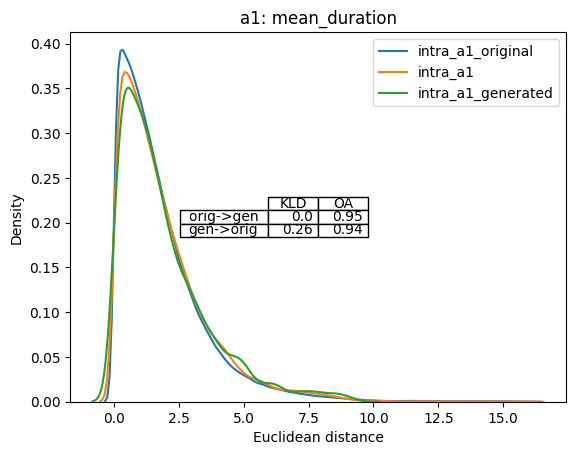

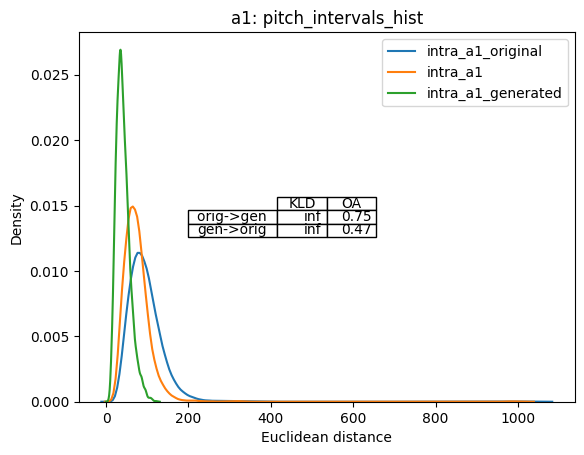

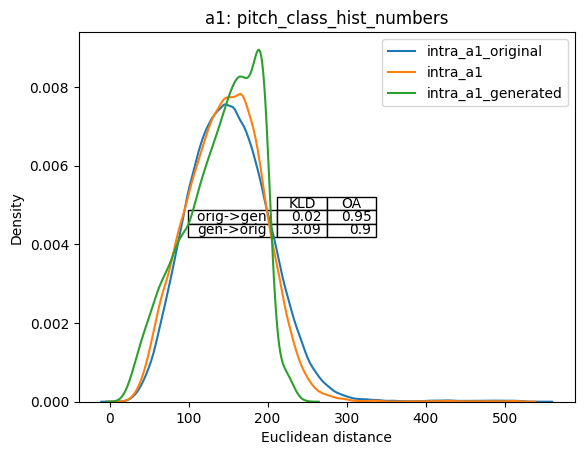

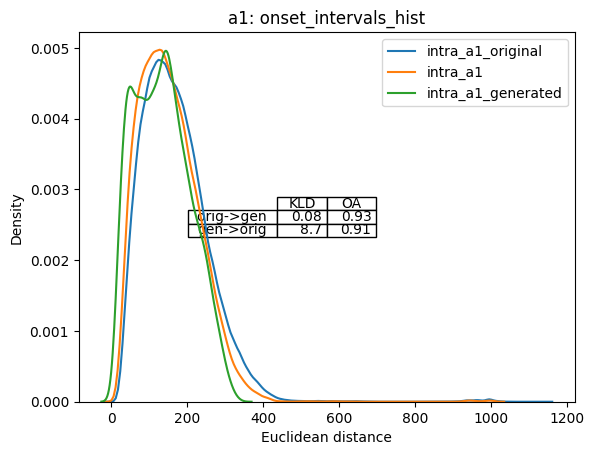

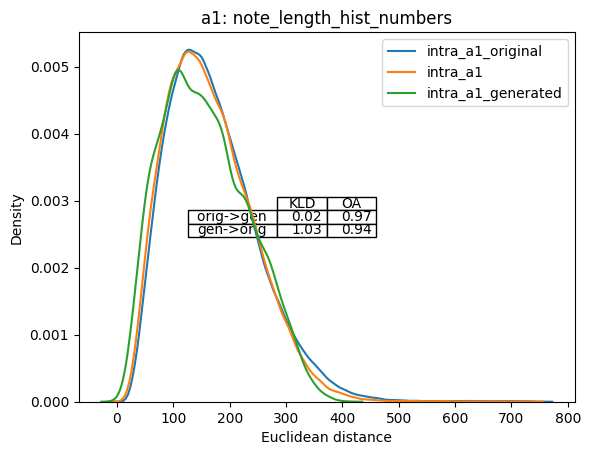

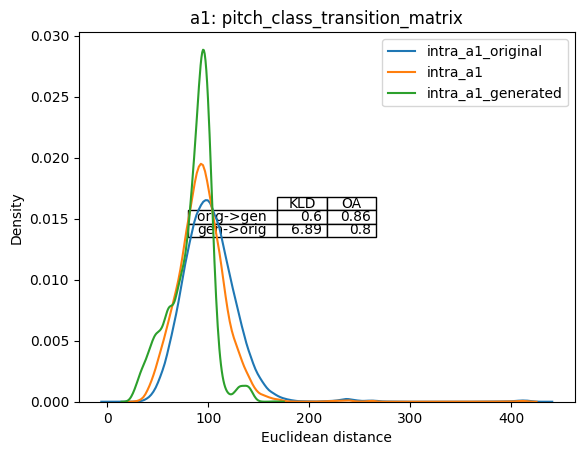

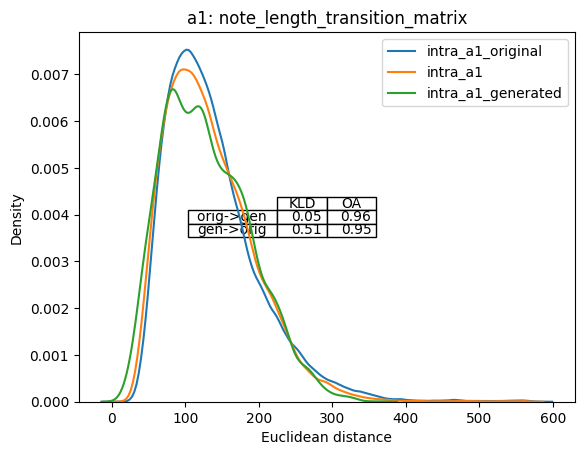

make path and load data
compute distances
compute kl and oa metrics


  0%|          | 0/18 [00:00<?, ?it/s]/Users/julialauten/DataspellProjects/MusicAI/4_evaluation/distance_functions.py:23: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(lambda x: min(pdf_A(x), pdf_B(x)), np.min((np.min(A), np.min(B))), np.max((np.max(A), np.max(B))))[0]
100%|██████████| 18/18 [09:04<00:00, 30.24s/it]


save distance plots


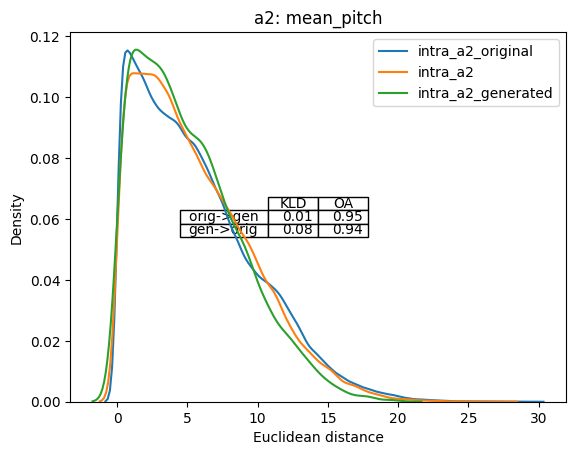

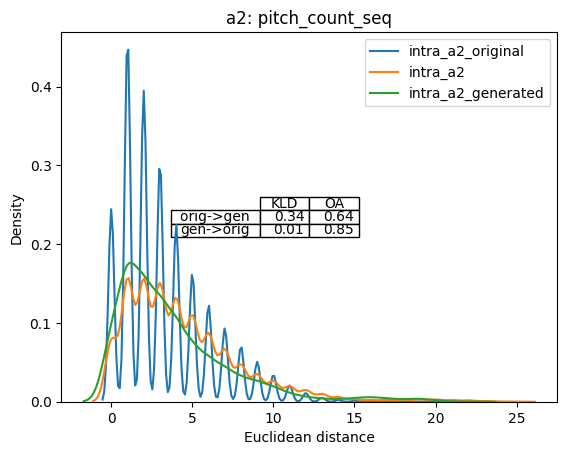

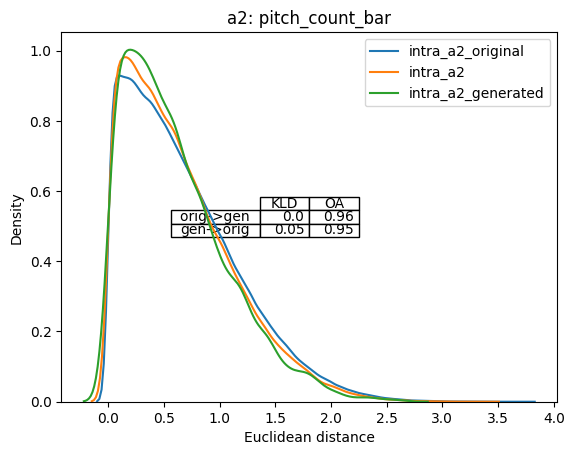

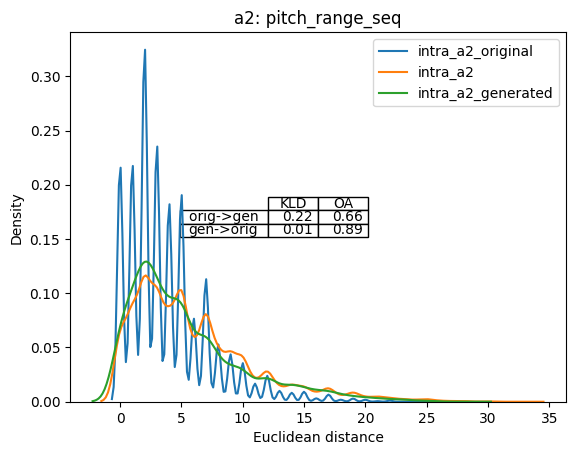

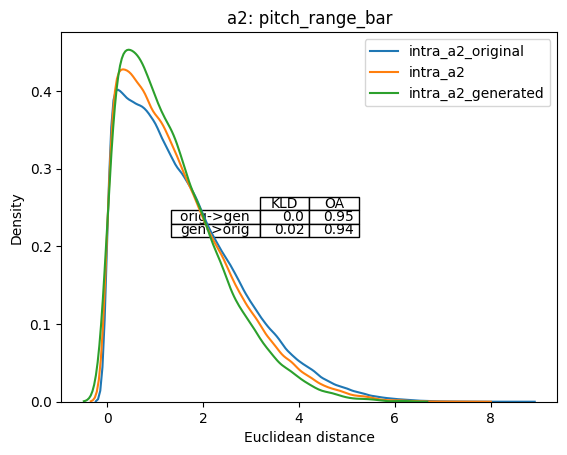

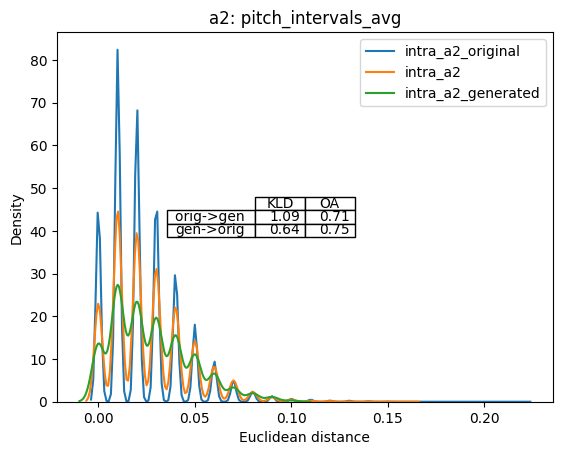

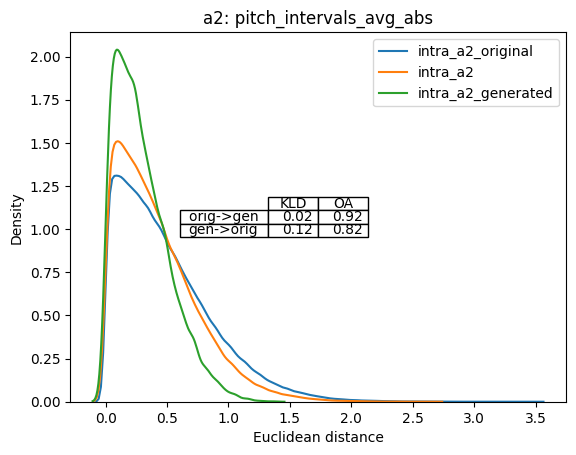

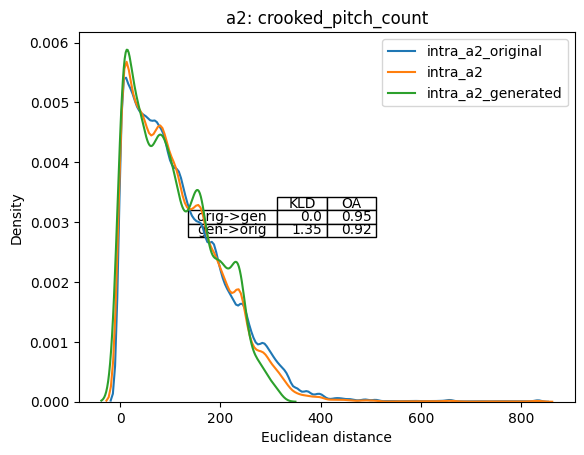

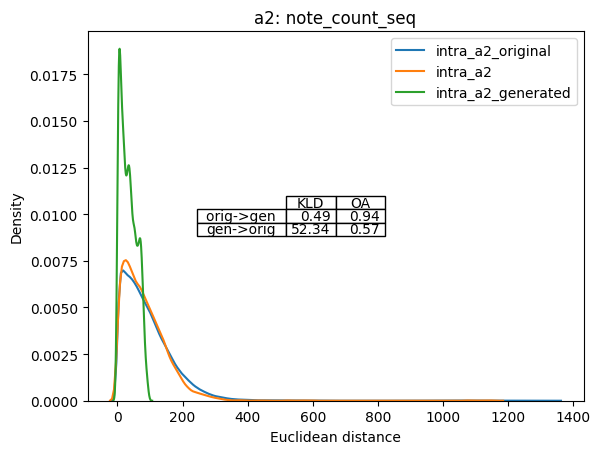

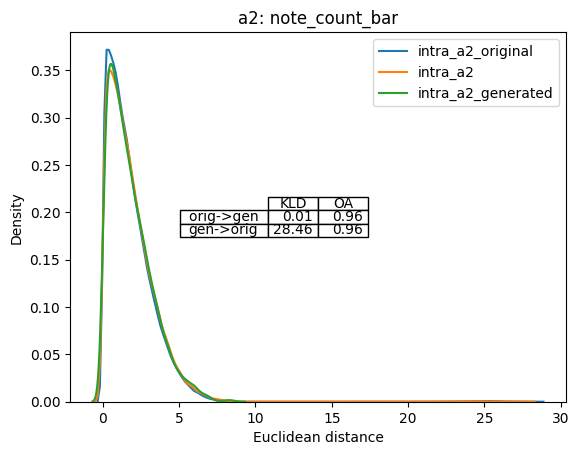

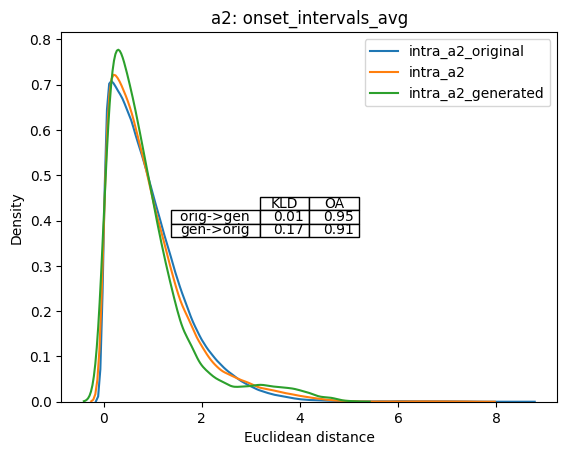

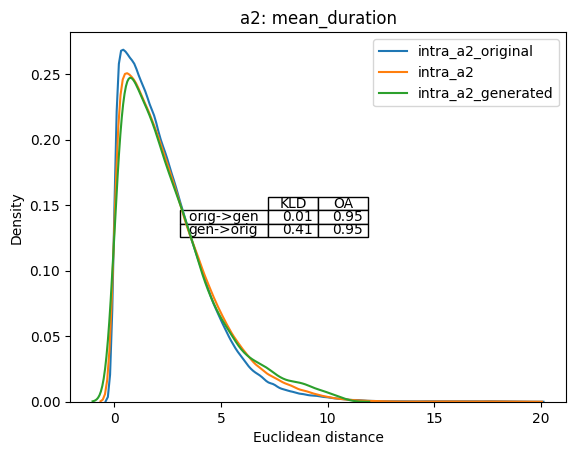

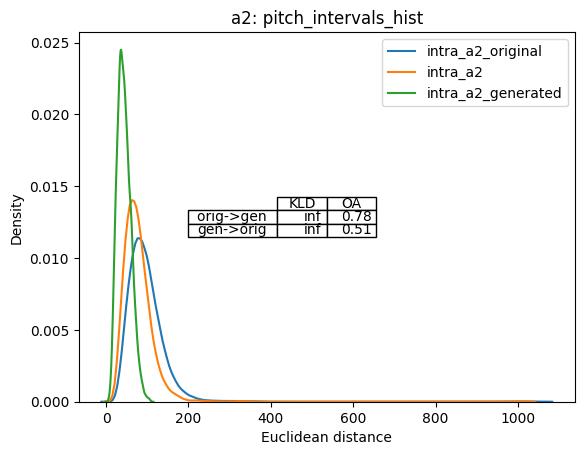

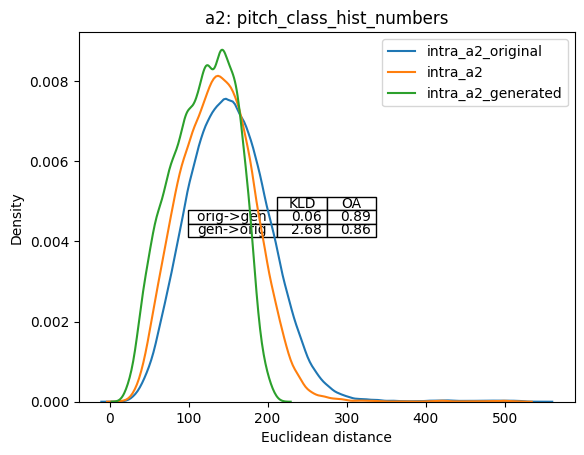

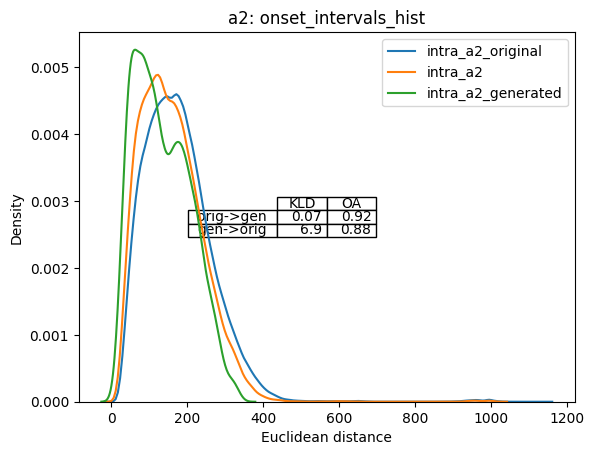

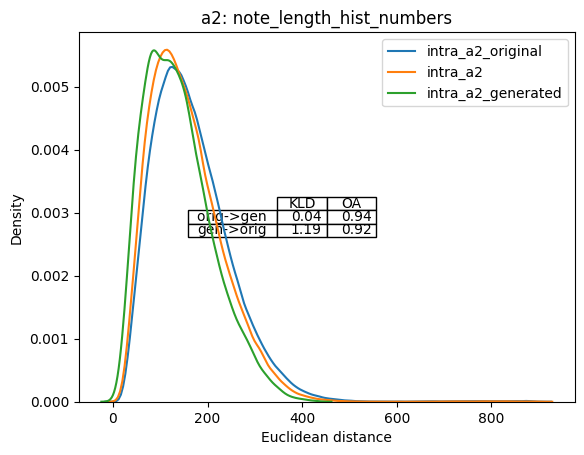

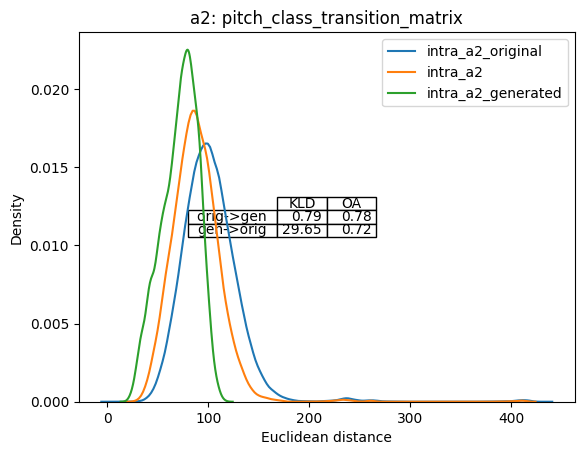

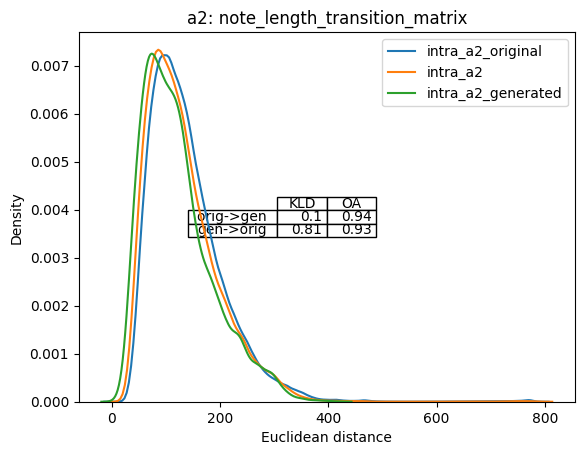

make path and load data
compute distances
compute kl and oa metrics


  6%|▌         | 1/18 [00:23<06:40, 23.54s/it]/Users/julialauten/DataspellProjects/MusicAI/4_evaluation/distance_functions.py:23: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(lambda x: min(pdf_A(x), pdf_B(x)), np.min((np.min(A), np.min(B))), np.max((np.max(A), np.max(B))))[0]
 39%|███▉      | 7/18 [03:44<05:37, 30.64s/it]/Users/julialauten/DataspellProjects/MusicAI/4_evaluation/distance_functions.py:23: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underes

save distance plots


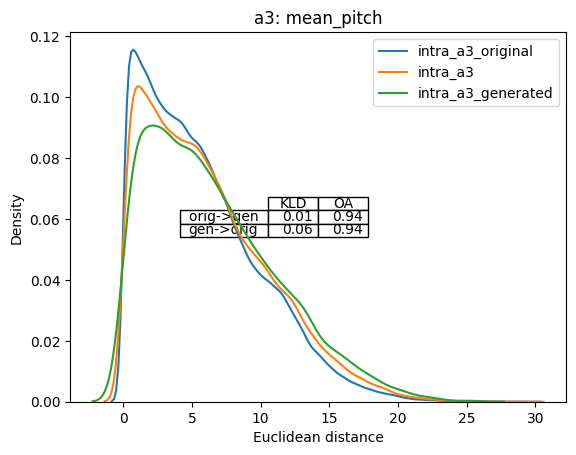

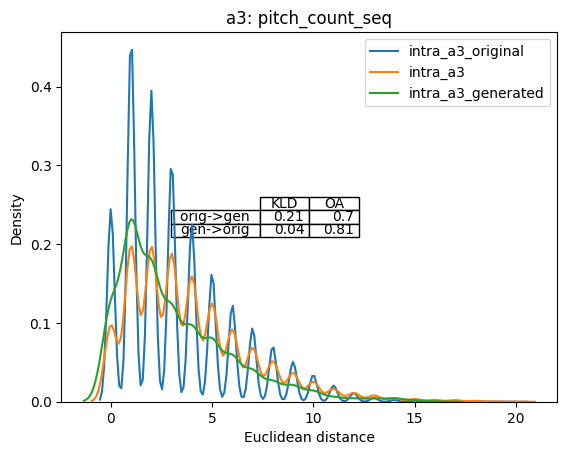

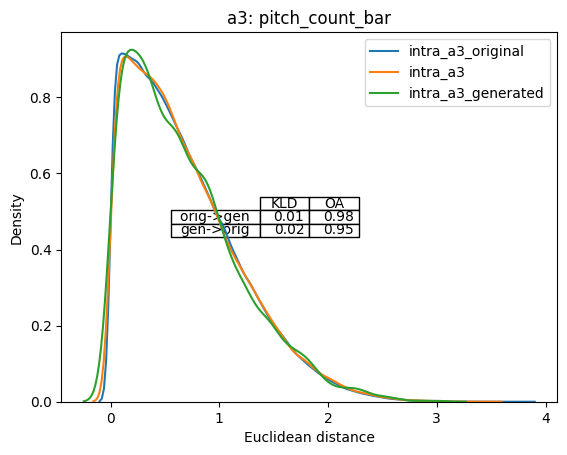

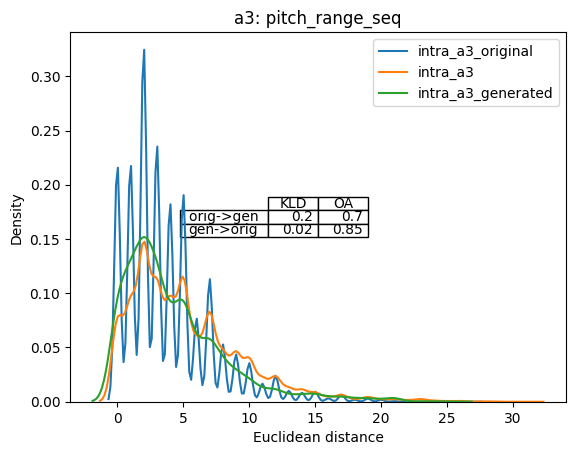

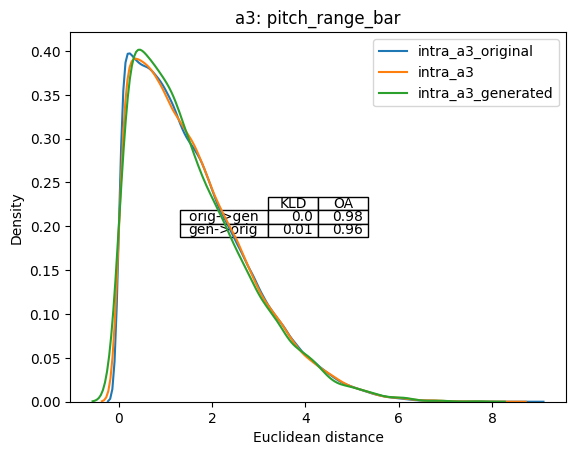

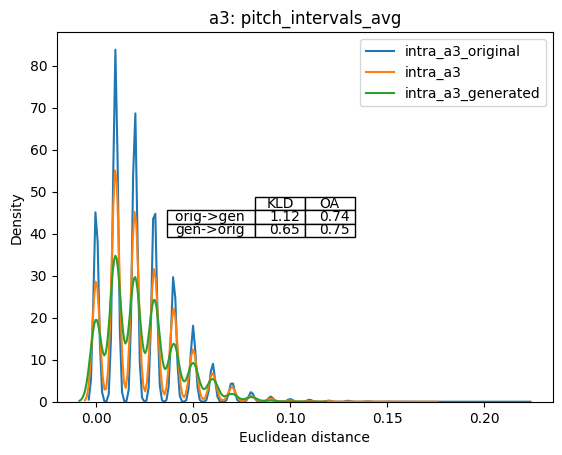

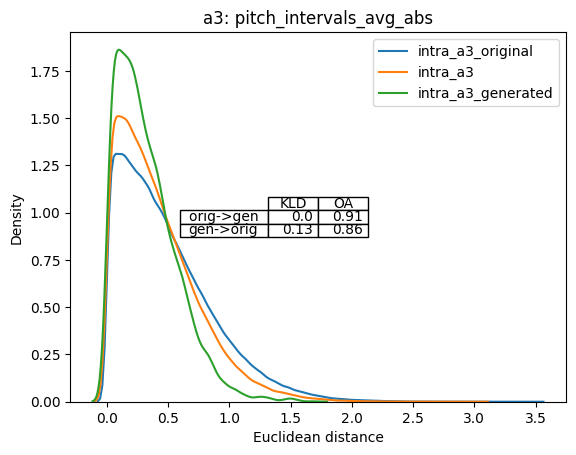

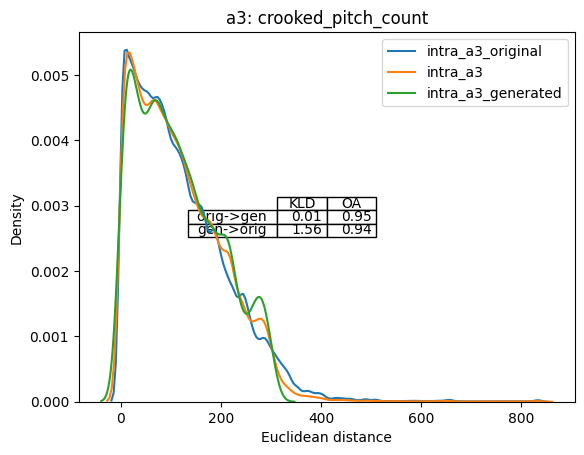

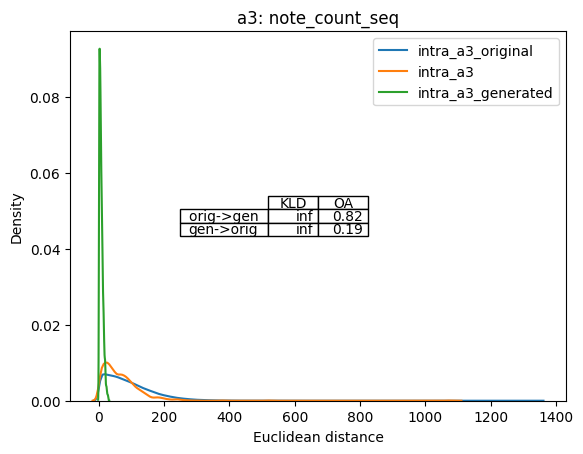

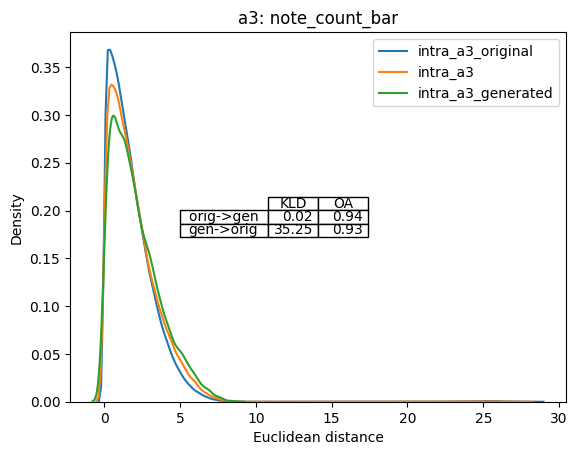

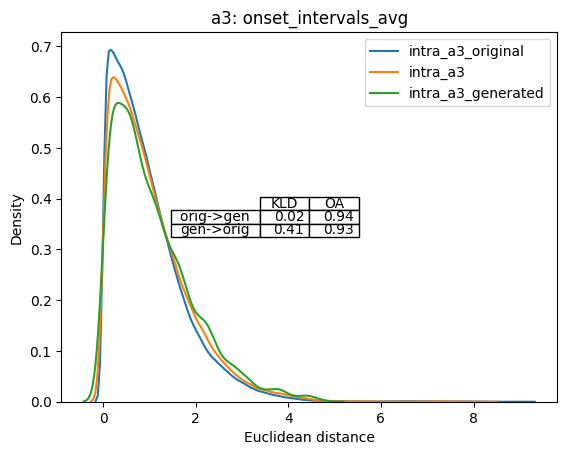

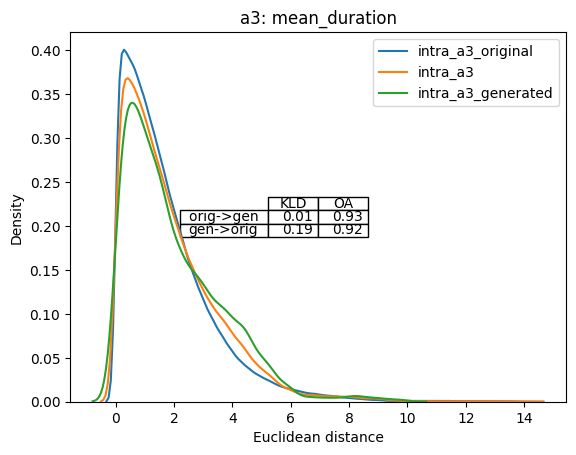

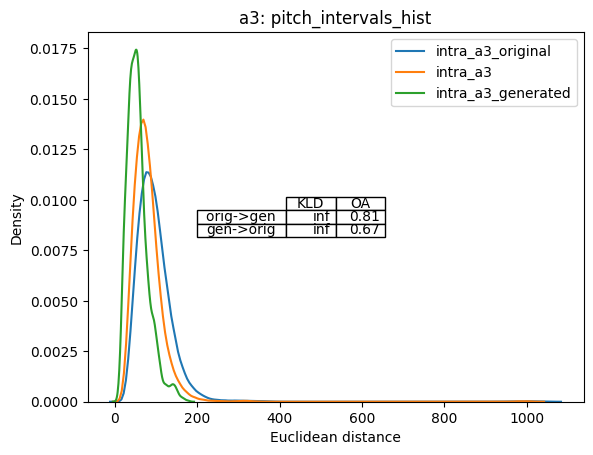

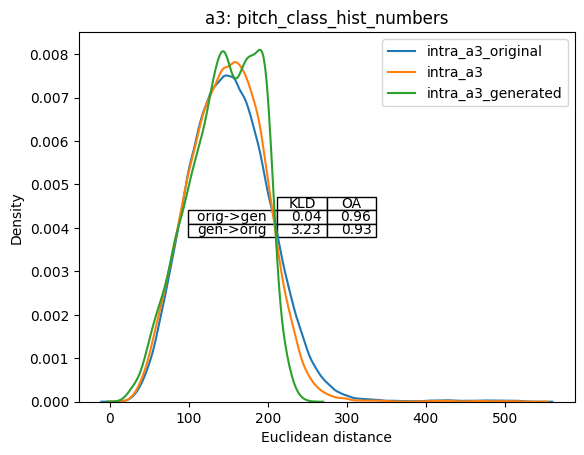

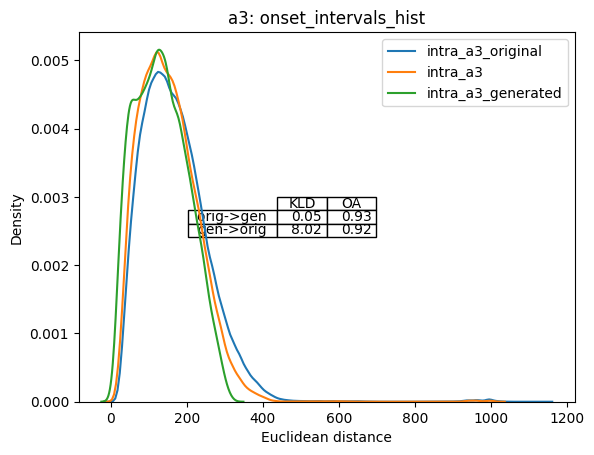

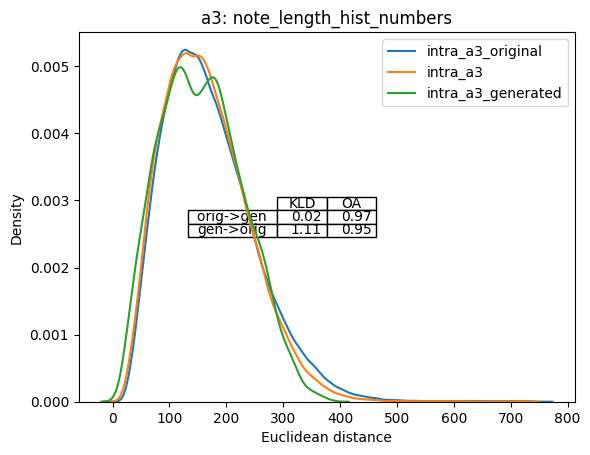

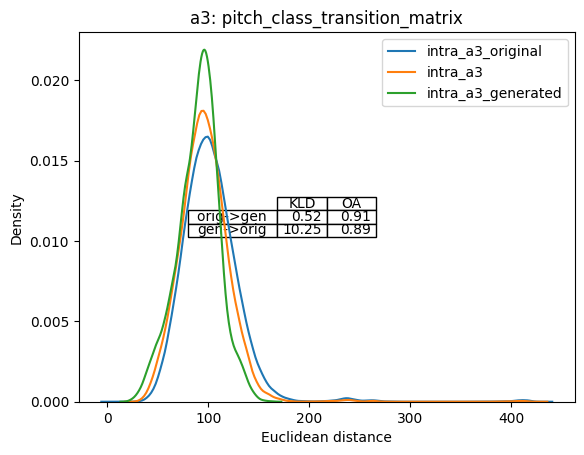

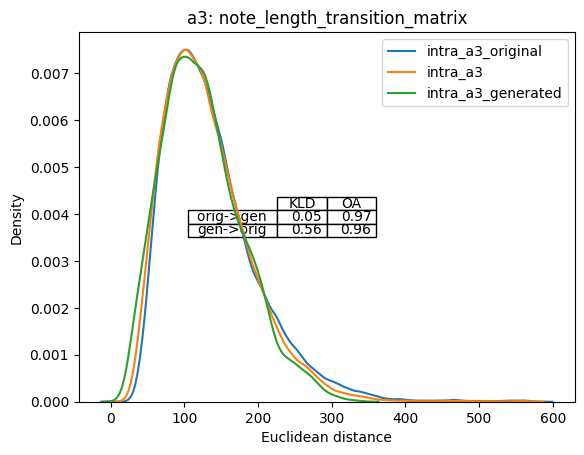

make path and load data
compute distances
compute kl and oa metrics


  0%|          | 0/18 [00:00<?, ?it/s]/Users/julialauten/DataspellProjects/MusicAI/4_evaluation/distance_functions.py:23: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return integrate.quad(lambda x: min(pdf_A(x), pdf_B(x)), np.min((np.min(A), np.min(B))), np.max((np.max(A), np.max(B))))[0]
  6%|▌         | 1/18 [00:30<08:30, 30.00s/it]/Users/julialauten/DataspellProjects/MusicAI/4_evaluation/distance_functions.py:23: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.

save distance plots


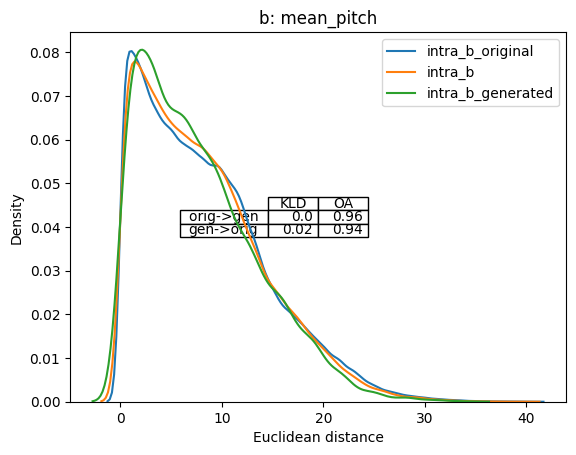

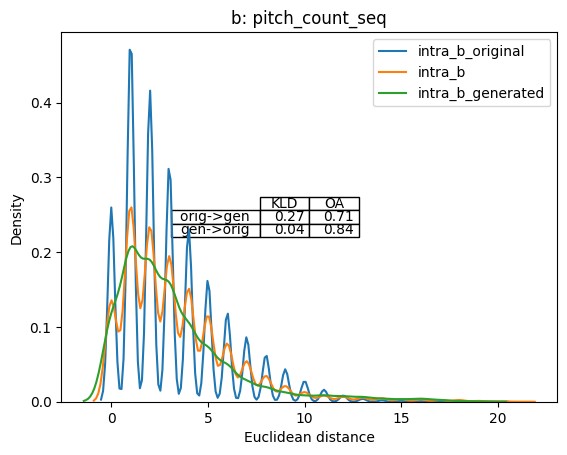

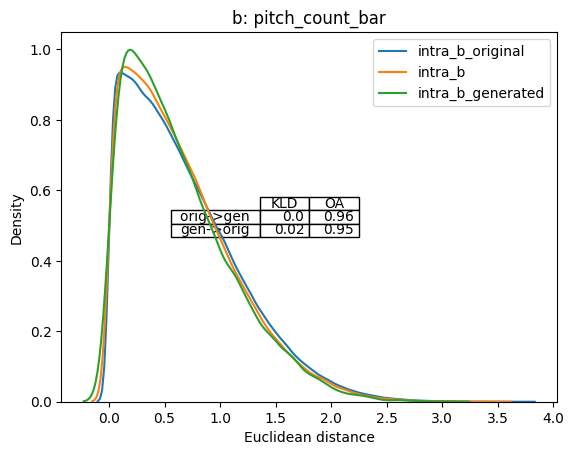

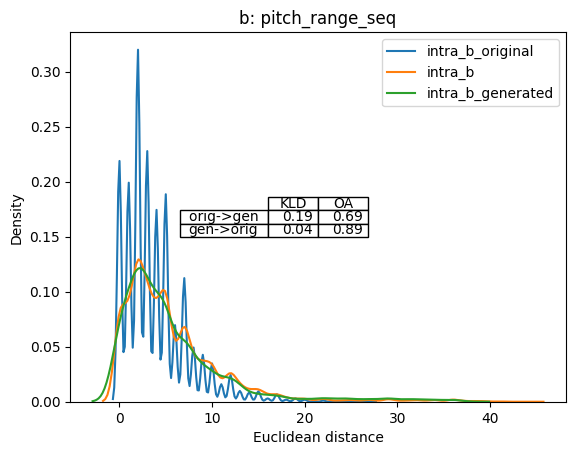

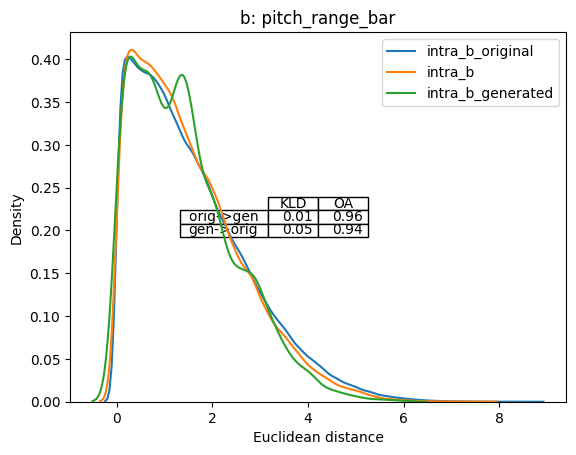

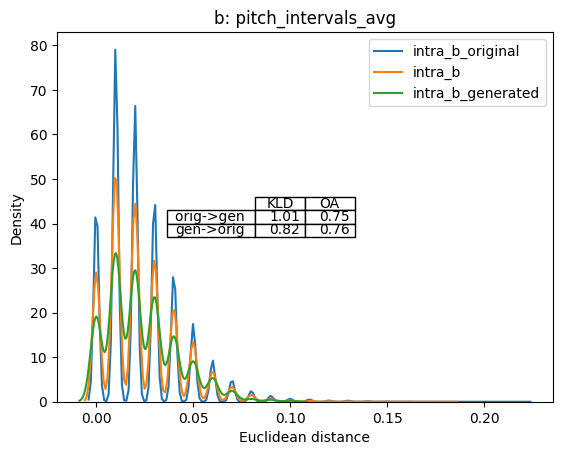

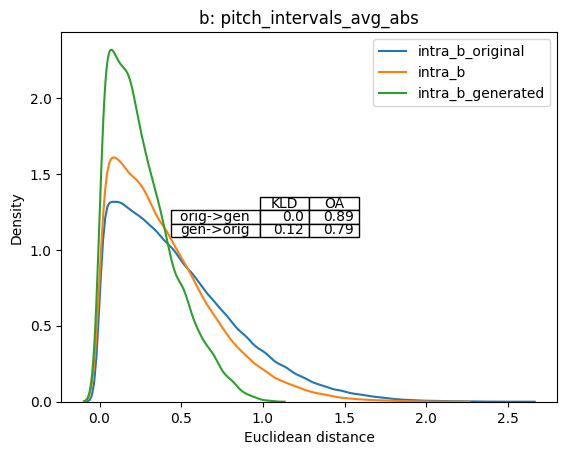

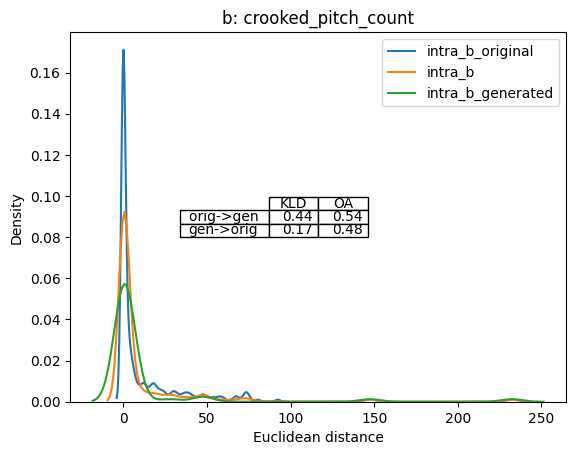

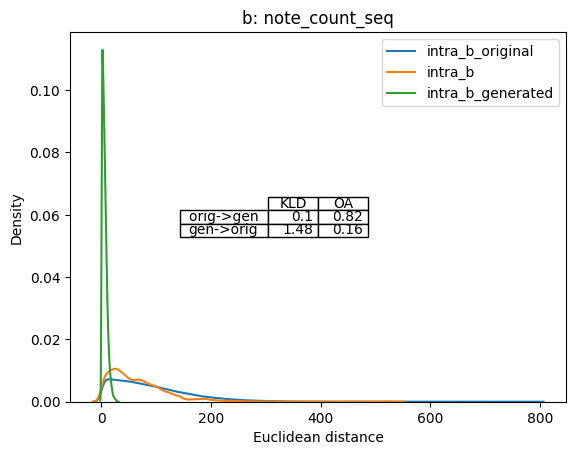

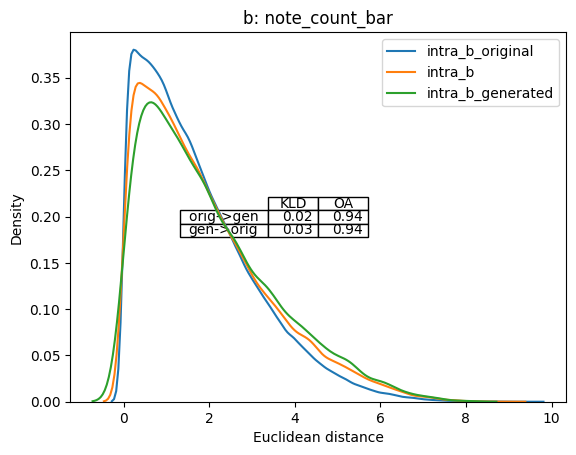

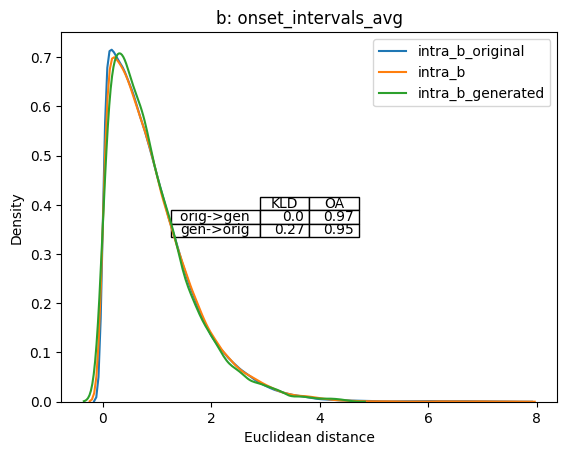

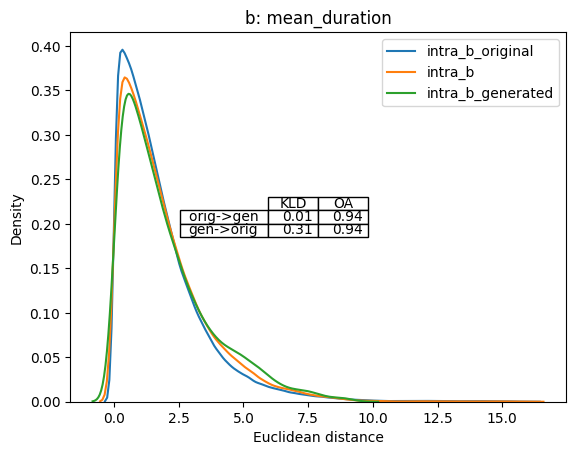

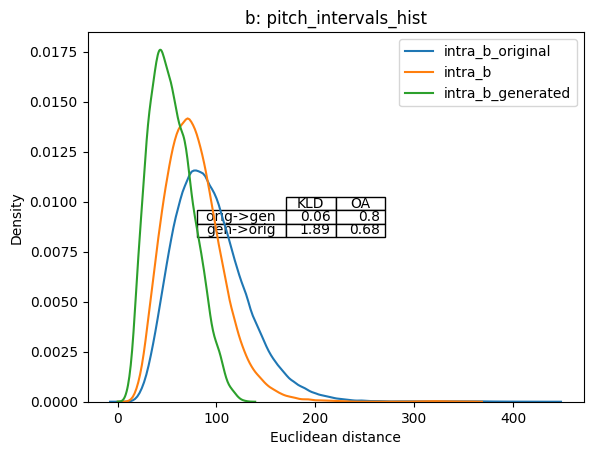

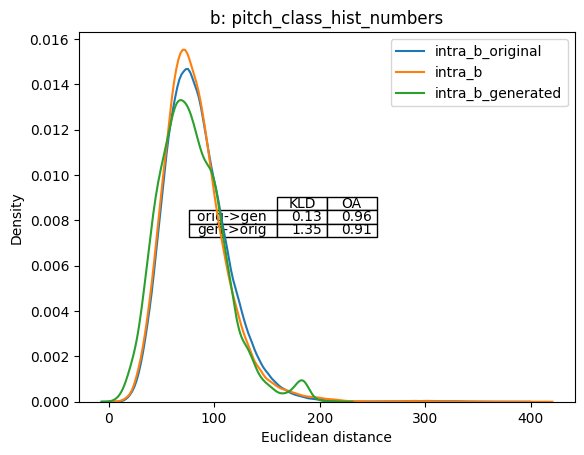

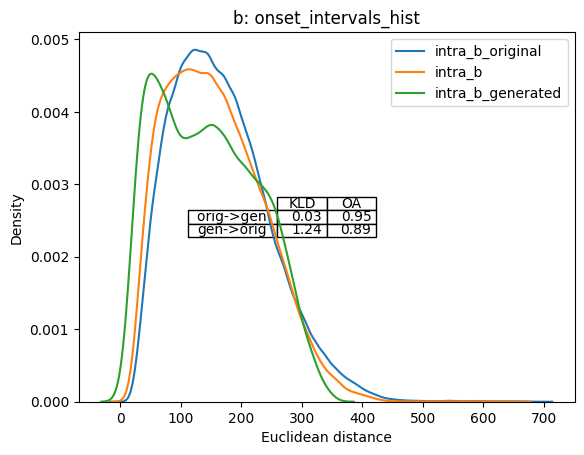

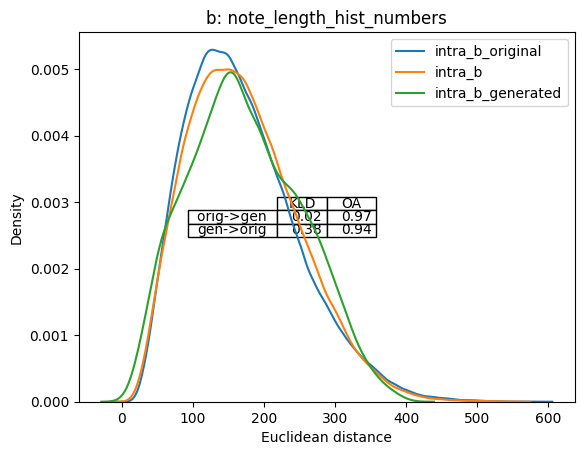

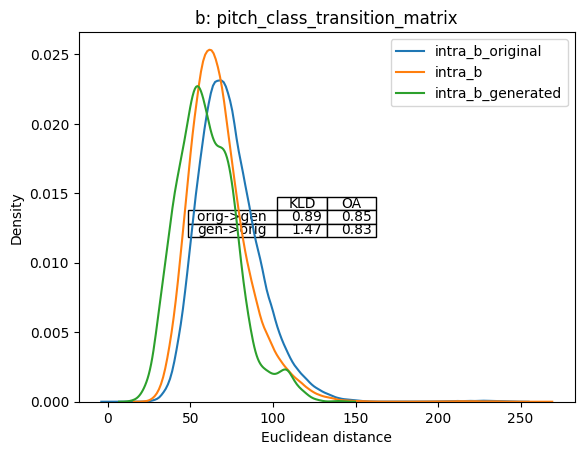

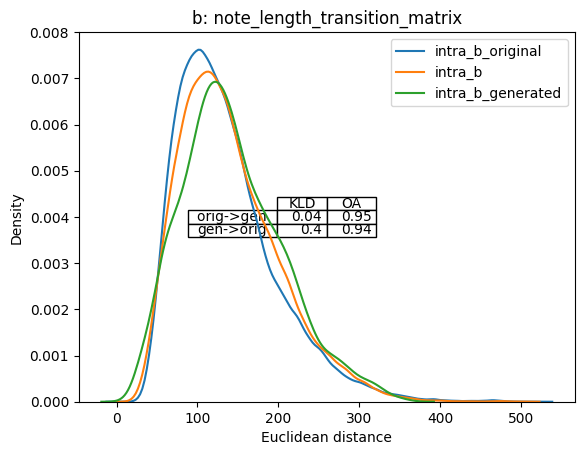

make path and load data
compute distances
compute kl and oa metrics


  6%|▌         | 1/18 [00:26<07:36, 26.87s/it]/Users/julialauten/DataspellProjects/MusicAI/4_evaluation/distance_functions.py:23: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(lambda x: min(pdf_A(x), pdf_B(x)), np.min((np.min(A), np.min(B))), np.max((np.max(A), np.max(B))))[0]
100%|██████████| 18/18 [08:59<00:00, 29.95s/it]


save distance plots


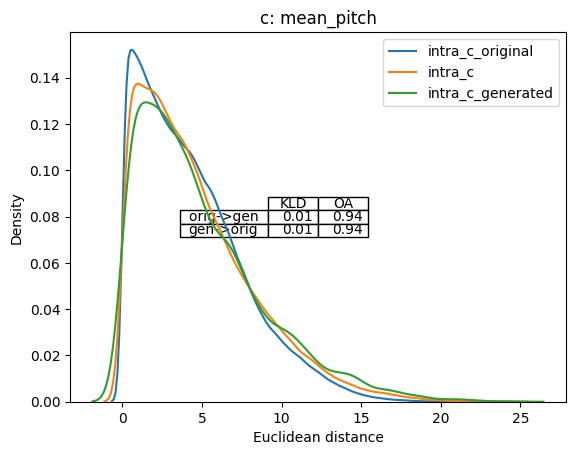

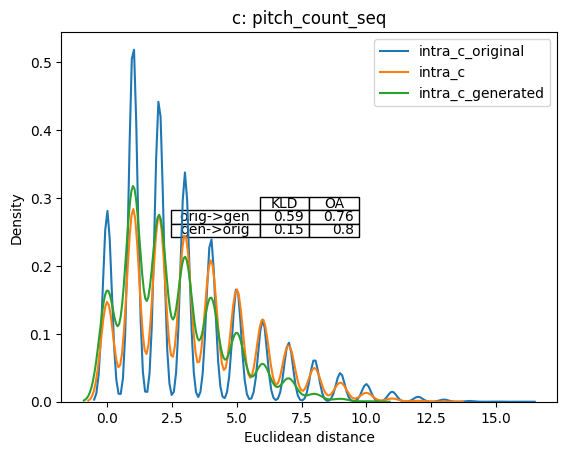

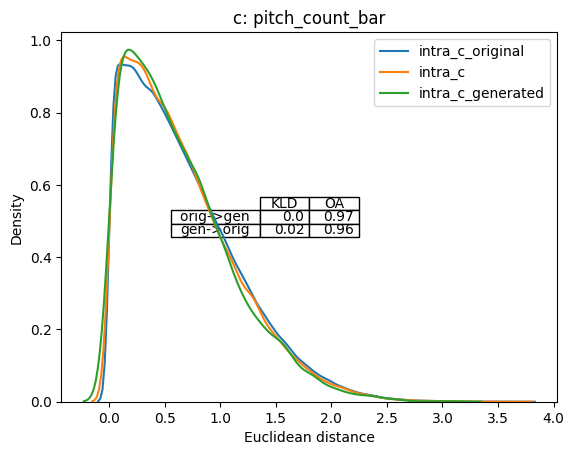

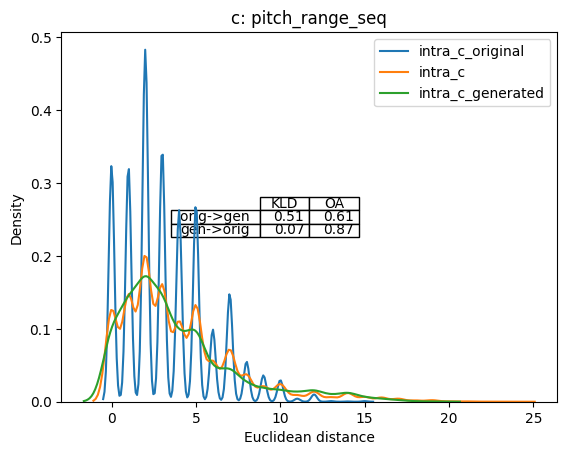

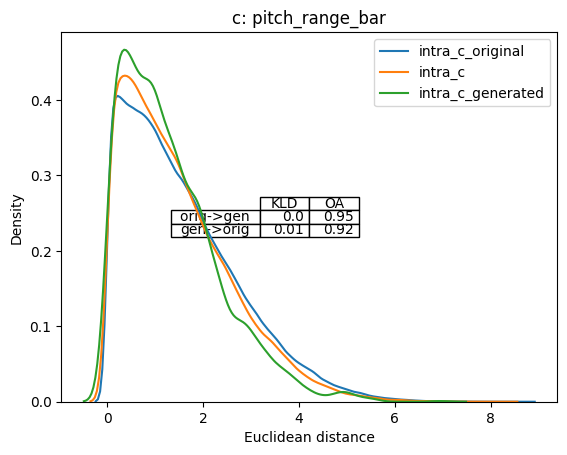

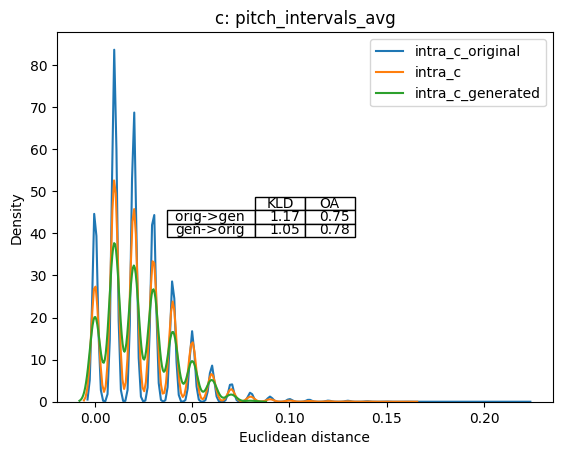

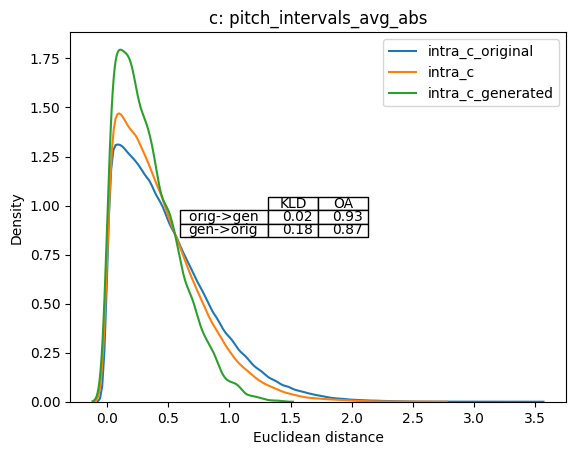

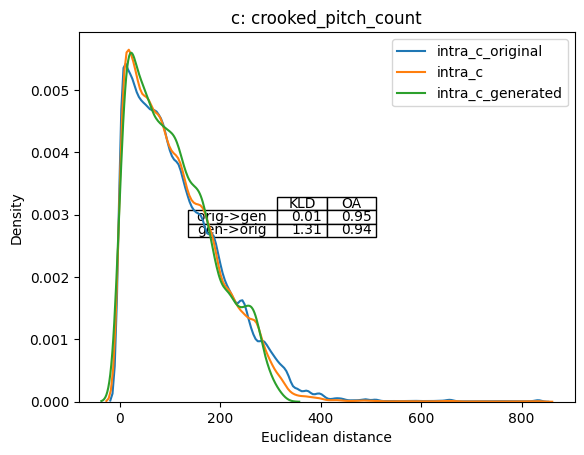

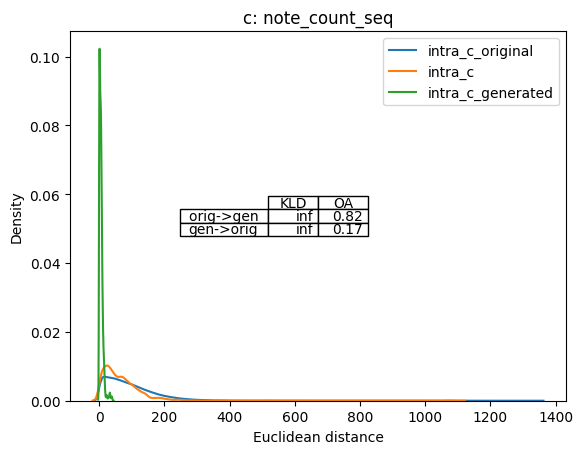

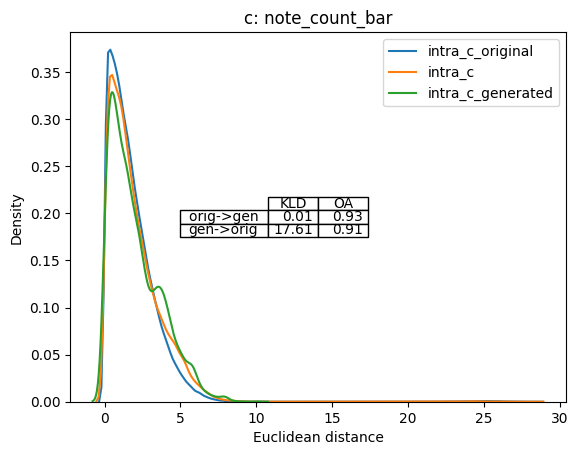

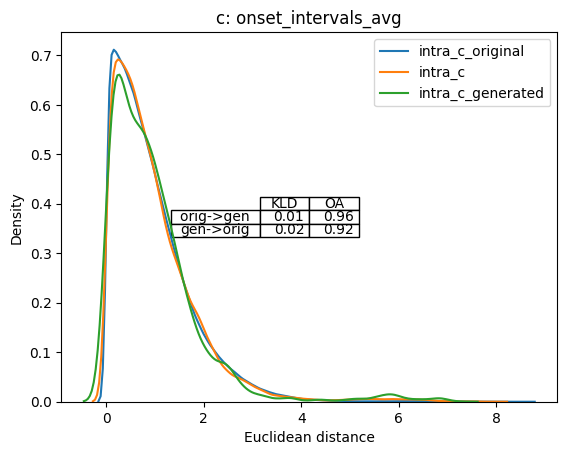

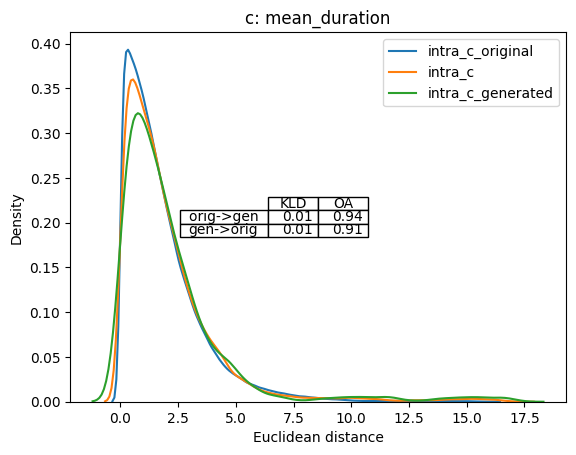

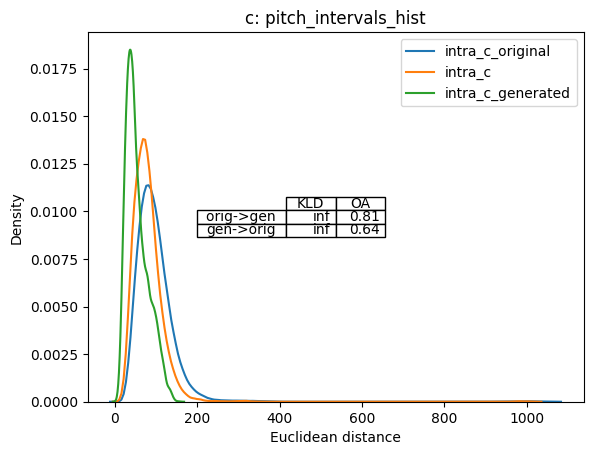

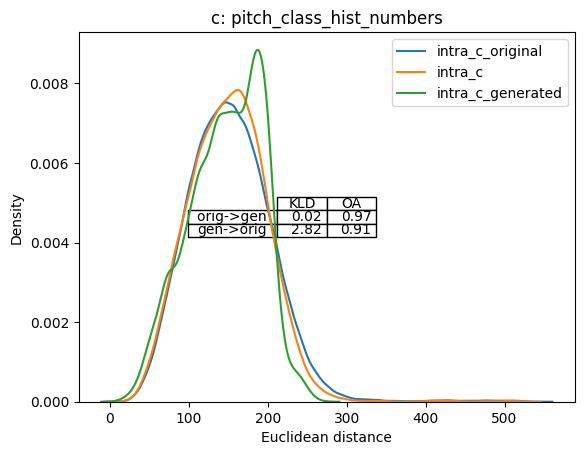

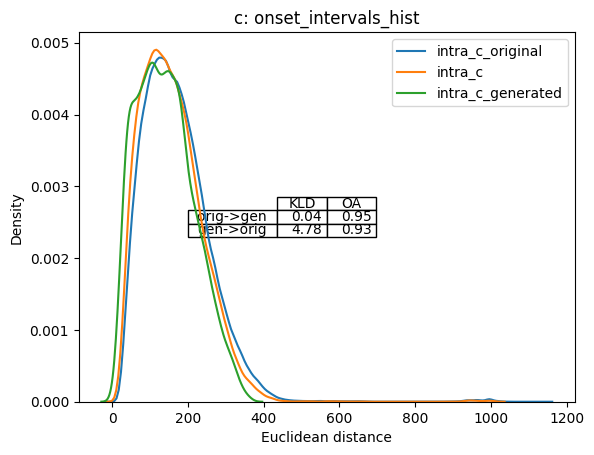

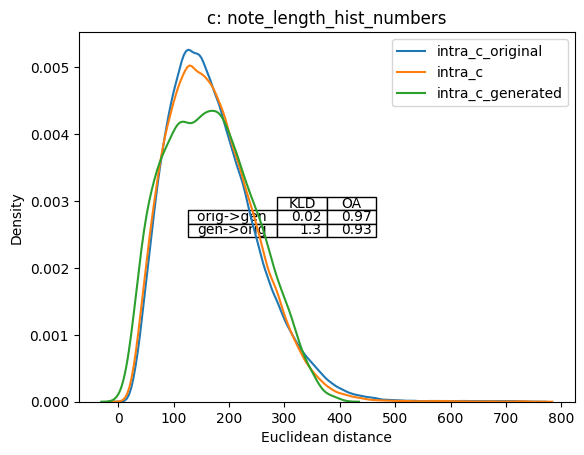

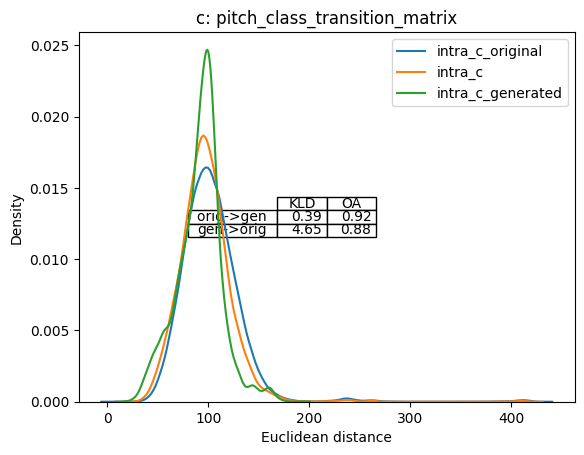

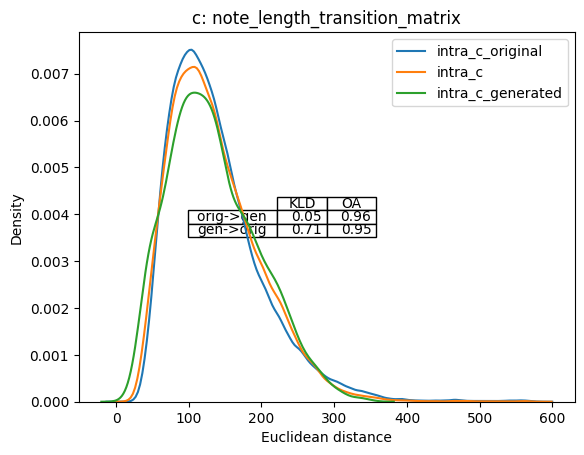

make path and load data
compute distances
compute kl and oa metrics


  0%|          | 0/18 [00:00<?, ?it/s]/Users/julialauten/DataspellProjects/MusicAI/4_evaluation/distance_functions.py:23: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(lambda x: min(pdf_A(x), pdf_B(x)), np.min((np.min(A), np.min(B))), np.max((np.max(A), np.max(B))))[0]
100%|██████████| 18/18 [07:41<00:00, 25.66s/it]


save distance plots


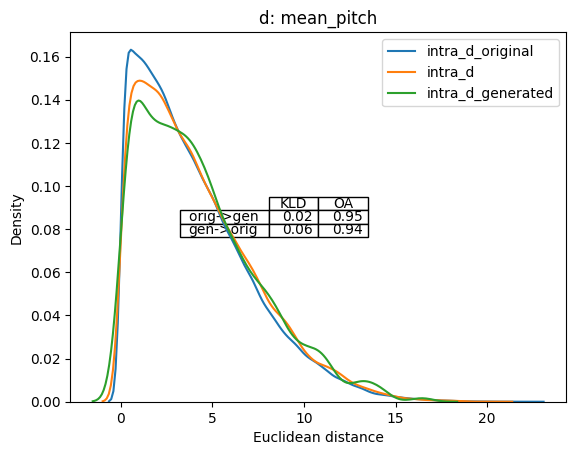

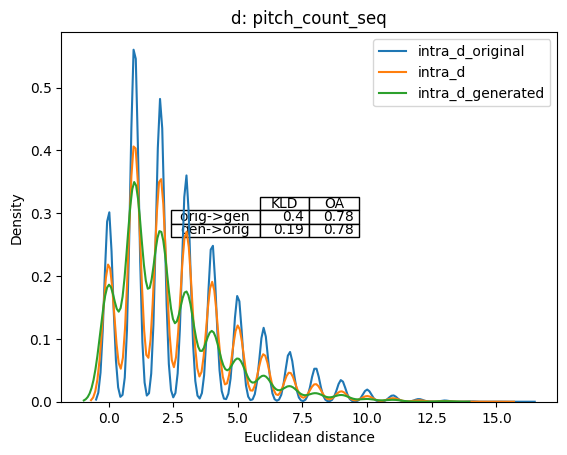

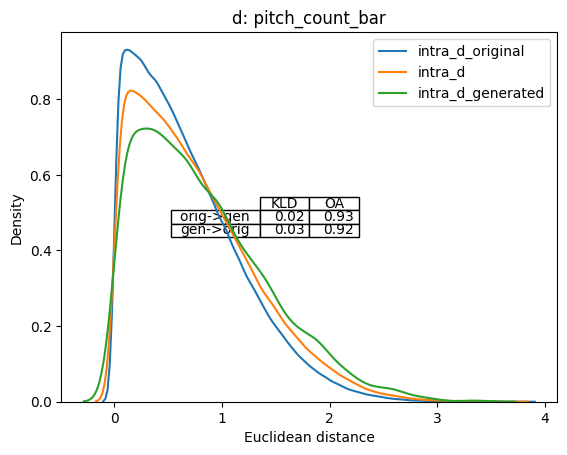

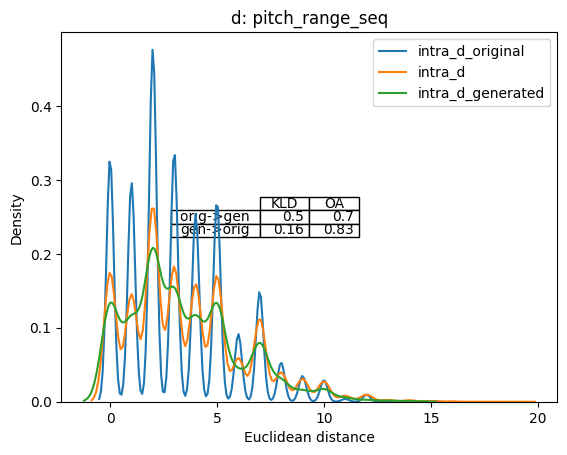

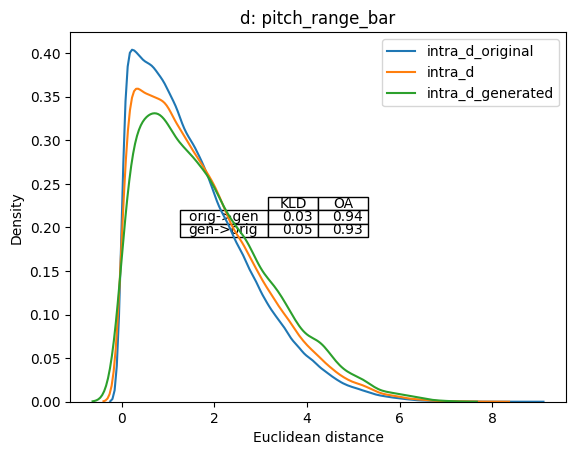

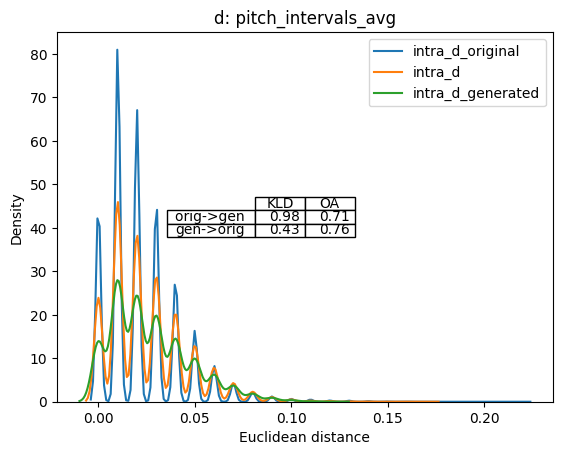

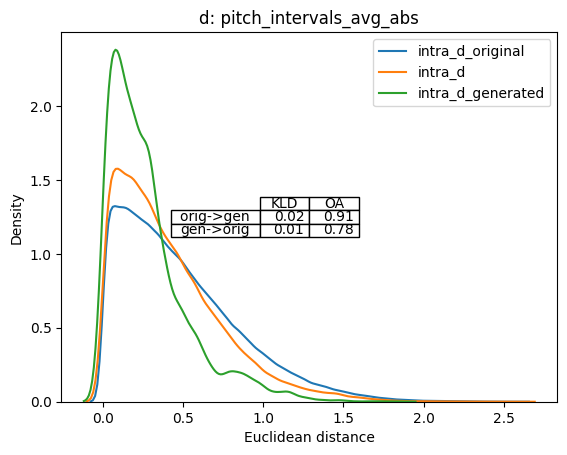

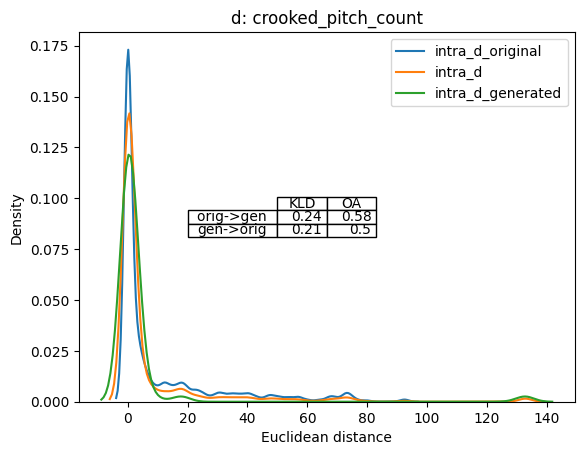

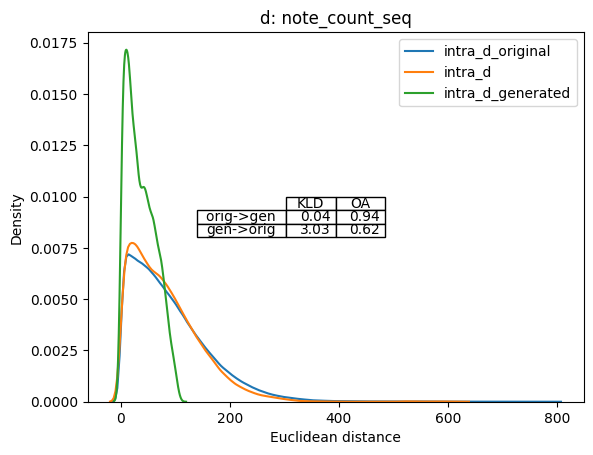

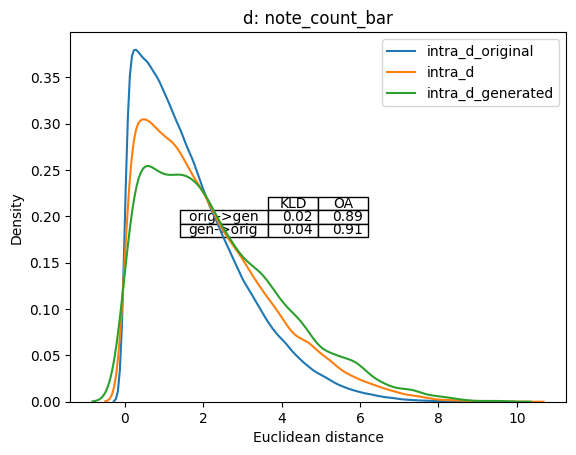

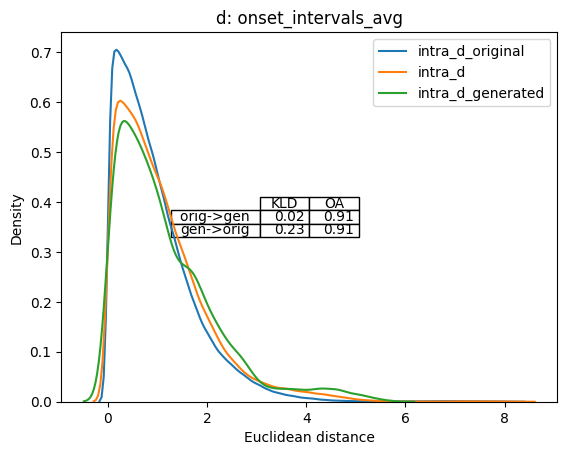

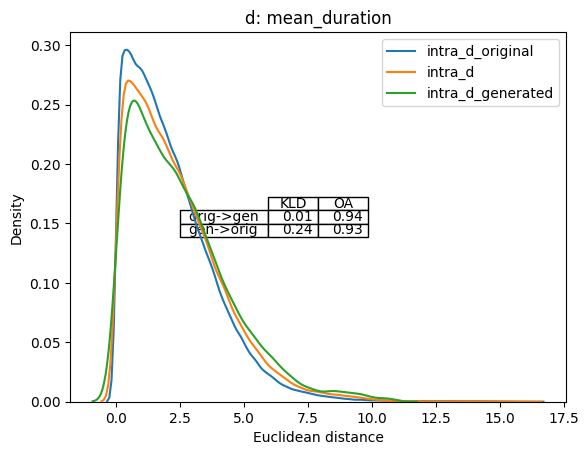

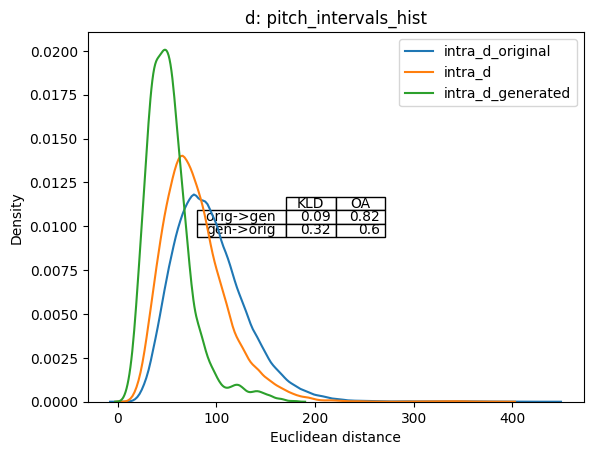

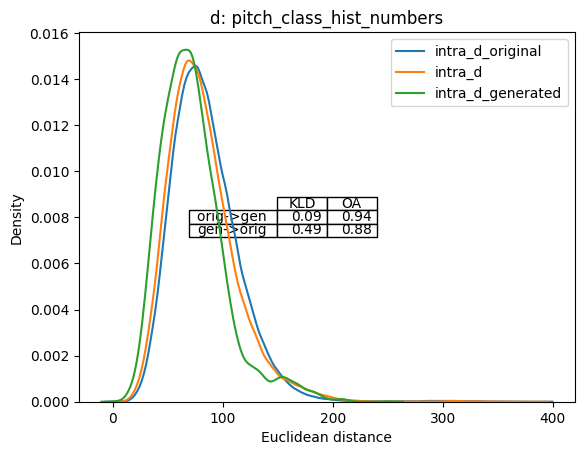

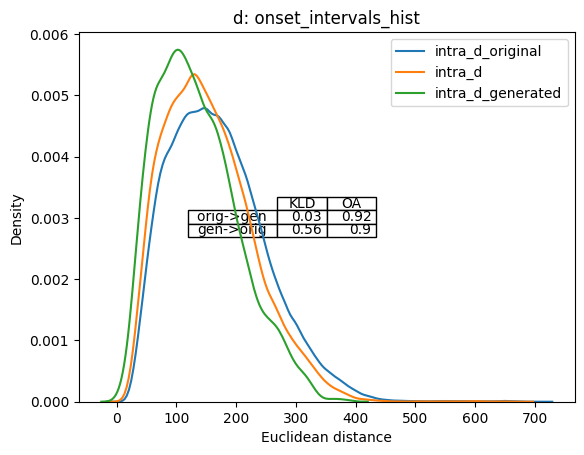

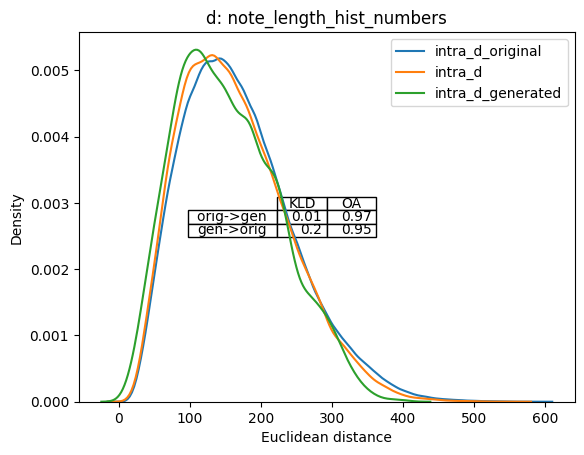

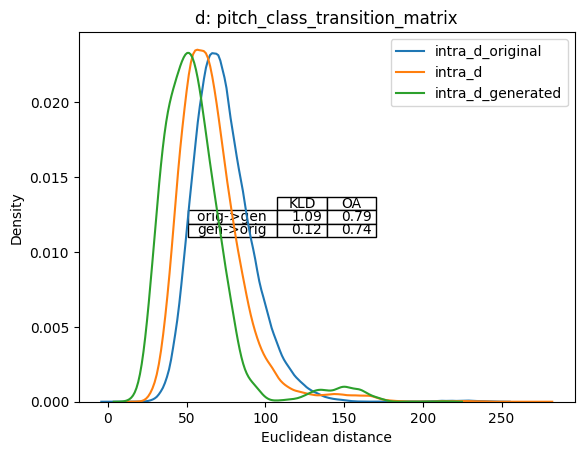

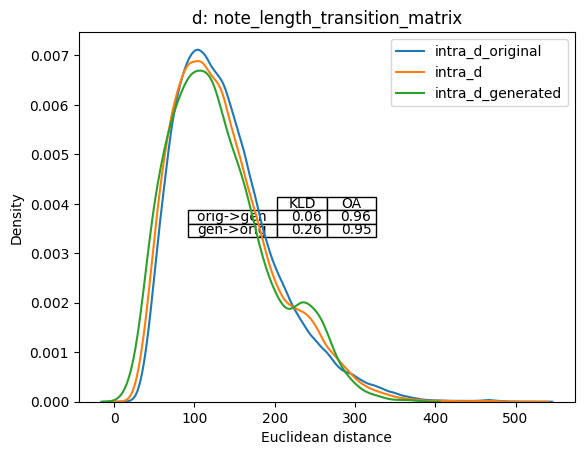

In [5]:
for model in ["a1", "a2", "a3", "b", "c", "d"]:

    print("make path and load data")
    if not os.path.exists(f"{PATH_DISTANCES}/{model}"):
        os.makedirs(f"{PATH_DISTANCES}/{model}")

    set1_eval = {key: seq_metrics_dic[f"{model}_original"][key] for key in metrics_list}
    set2_eval = {key: seq_metrics_dic[f"{model}_generated"][key] for key in metrics_list}

    print("compute distances")
    set1_intra, set2_intra, sets_inter = get_distances(set1_eval, set2_eval, metrics_list)
    print("compute kl and oa metrics")
    kl_oa_metrics = get_kl_oa_metrics(set1_eval, set2_eval, metrics_list, set1_intra, set2_intra, sets_inter)
    pd.DataFrame(kl_oa_metrics).to_excel(f"{PATH_DISTANCES}/{model}/{model}_kl_oa_metrics.xlsx")

    print("save distance plots")
    for i in range(0,len(metrics_list)):
        ax = sns.kdeplot(set1_intra[i], label=f"intra_{model}_original")
        sns.kdeplot(sets_inter[i], label=f"intra_{model}")
        sns.kdeplot(set2_intra[i], label=f"intra_{model}_generated")

        cell_text = [
            [np.round(kl_oa_metrics[metrics_list[i]]["kl_set1_inter"], 2), np.round(kl_oa_metrics[metrics_list[i]]["ol_set1_inter"], 2)],
            [np.round(kl_oa_metrics[metrics_list[i]]["kl_set2_inter"], 2), np.round(kl_oa_metrics[metrics_list[i]]["ol_set2_inter"], 2)]
        ]
        row_labels = ['orig->gen ', 'gen->orig']
        col_labels = ['KLD', 'OA']
        table = ax.table(cellText=cell_text, rowLabels=row_labels, colLabels=col_labels, loc="center")
        table.scale(0.2, 0.8)

        plt.legend()
        plt.title(f"{model}: {metrics_list[i]}")
        plt.xlabel('Euclidean distance')
        plt.savefig(f"{PATH_DISTANCES}/{model}/{model}_{metrics_list[i]}.png")
        plt.show()